In [53]:
%pip install xgboost
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier
from scipy import stats
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os 
os.getcwd()


'c:\\kaggle\\Summer Analytics\\dataset and all'

In [3]:
train_file_path= "training_set_features.csv";
df=pd.read_csv(train_file_path);
# df.set_index('respondent_id', inplace=True)
X=df
df

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg


In [4]:
test_file_path= "training_set_labels.csv";
y=pd.read_csv(test_file_path);
# y.set_index('respondent_id', inplace=True)
y


,respondent_id,xyz_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0
...,...,...,...
26702,26702,0,0
26703,26703,0,0
26704,26704,0,1
26705,26705,0,0


In [5]:
y.set_index('respondent_id', inplace=True)
df.set_index('respondent_id', inplace=True)

In [6]:
df.T

respondent_id,0,1,2,3,4,5,6,7,8,9,...,26697,26698,26699,26700,26701,26702,26703,26704,26705,26706
xyz_concern,1.0,3.0,1.0,1.0,2.0,3.0,0.0,1.0,0.0,2.0,...,1.0,2.0,2.0,3.0,2.0,2.0,1.0,2.0,1.0,0.0
xyz_knowledge,0.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,...,1.0,1.0,2.0,1.0,2.0,0.0,2.0,2.0,1.0,0.0
behavioral_antiviral_meds,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
behavioral_avoidance,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
behavioral_face_mask,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
behavioral_wash_hands,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
behavioral_large_gatherings,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
behavioral_outside_home,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
behavioral_touch_face,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,NaN,0.0
doctor_recc_xyz,0.0,0.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [7]:
def one_hot_encode(df, column):
    encoder = OneHotEncoder()
    one_hot_array = encoder.fit_transform(df[[column]]).toarray()
    one_hot_df = pd.DataFrame(one_hot_array, columns=encoder.get_feature_names_out())
    return one_hot_df

def concat_one_hot(df, one_hot_df):
    df=pd.merge(df, one_hot_df, left_index=True, right_index=True)
    return df

In [8]:
df.T

respondent_id,0,1,2,3,4,5,6,7,8,9,...,26697,26698,26699,26700,26701,26702,26703,26704,26705,26706
xyz_concern,1.0,3.0,1.0,1.0,2.0,3.0,0.0,1.0,0.0,2.0,...,1.0,2.0,2.0,3.0,2.0,2.0,1.0,2.0,1.0,0.0
xyz_knowledge,0.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,...,1.0,1.0,2.0,1.0,2.0,0.0,2.0,2.0,1.0,0.0
behavioral_antiviral_meds,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
behavioral_avoidance,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
behavioral_face_mask,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
behavioral_wash_hands,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
behavioral_large_gatherings,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
behavioral_outside_home,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
behavioral_touch_face,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,NaN,0.0
doctor_recc_xyz,0.0,0.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [9]:

ONE_HOT_COLUMNS = ["age_group","education","employment_occupation","employment_industry","census_msa","employment_status","rent_or_own","marital_status","income_poverty","sex","race","hhs_geo_region"]

def preprocess(df):
    
    for column in ONE_HOT_COLUMNS:
        if column in df.columns:
            one_hot_df = one_hot_encode(df, column)
            df = concat_one_hot(df, one_hot_df)

    for column in ONE_HOT_COLUMNS:
        if column in df.columns:
            df = df.drop(columns=column)  
        
    return df

In [10]:
df= preprocess(df)
df.T

respondent_id,0,1,2,3,4,5,6,7,8,9,...,26697,26698,26699,26700,26701,26702,26703,26704,26705,26706
xyz_concern,1.0,3.0,1.0,1.0,2.0,3.0,0.0,1.0,0.0,2.0,...,1.0,2.0,2.0,3.0,2.0,2.0,1.0,2.0,1.0,0.0
xyz_knowledge,0.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,...,1.0,1.0,2.0,1.0,2.0,0.0,2.0,2.0,1.0,0.0
behavioral_antiviral_meds,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
behavioral_avoidance,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
behavioral_face_mask,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hhs_geo_region_lrircsnp,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
hhs_geo_region_lzgpxyit,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
hhs_geo_region_mlyzmhmf,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
hhs_geo_region_oxchjgsf,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
df.columns = df.columns.str.replace(r'\W', '_', regex=True)
df.columns = df.columns.str.replace(',', '_')

In [12]:
# for col in df.columns:
#     plt.figure(figsize=(14, 6))
    
#     plt.subplot(121)
#     sns.histplot(df[col], kde=True)
#     plt.title(f'Histogram and KDE of {col}')
    
#     plt.subplot(122)
#     sns.boxplot(x=df[col])
#     plt.title(f'Box Plot of {col}')
    
#     plt.show()

In [13]:
for i in df.columns:
    print(i)

xyz_concern
xyz_knowledge
behavioral_antiviral_meds
behavioral_avoidance
behavioral_face_mask
behavioral_wash_hands
behavioral_large_gatherings
behavioral_outside_home
behavioral_touch_face
doctor_recc_xyz
doctor_recc_seasonal
chronic_med_condition
child_under_6_months
health_worker
health_insurance
opinion_xyz_vacc_effective
opinion_xyz_risk
opinion_xyz_sick_from_vacc
opinion_seas_vacc_effective
opinion_seas_risk
opinion_seas_sick_from_vacc
household_adults
household_children
age_group_18___34_Years
age_group_35___44_Years
age_group_45___54_Years
age_group_55___64_Years
age_group_65__Years
education_12_Years
education___12_Years
education_College_Graduate
education_Some_College
education_nan
employment_occupation_bxpfxfdn
employment_occupation_ccgxvspp
employment_occupation_cmhcxjea
employment_occupation_dcjcmpih
employment_occupation_dlvbwzss
employment_occupation_emcorrxb
employment_occupation_haliazsg
employment_occupation_hfxkjkmi
employment_occupation_hodpvpew
employment_occupati

In [14]:
# correlation_matrix = df.corr()

# print(correlation_matrix)
# correlation_with_xyz_vaccine= correlation_matrix['xyz_vaccine'].sort_values(ascending=False)

# print(correlation_with_xyz_vaccine)

In [15]:
# correlation_with_xyz_vaccine= correlation_matrix[['xyz_vaccine']].transpose()


# plt.figure(figsize=(100, 1))
# sns.heatmap(correlation_with_xyz_vaccine, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
# plt.title('Correlation with XYZ Vaccine')
# plt.show()

In [16]:
# from sklearn.preprocessing import PowerTransformer
# import numpy as np
# scaler = StandardScaler()
# scaler.fit(df)
# df_scaled = scaler.transform(df)



# pt = PowerTransformer(method='yeo-johnson')
# df_transformed = pt.fit_transform(df_scaled)

# # Calculate Z-scores
# z = np.abs(stats.zscore(df_transformed))

# # Identify where Z-score > 3 (outliers)
# outliers = np.where(z > 3)

# # Print the number of outliers
# print("Number of outliers for z-score: {}".format(len(outliers[1])))

# # Identify rows with any outliers
# rows_to_remove = np.unique(outliers[0])

# # Remove outliers from the original data
# df_cleaned = np.delete(df_transformed, rows_to_remove, axis=0)
# y_cleaned = np.delete(y.values, rows_to_remove, axis=0)


# df_cleaned_df = pd.DataFrame(df_cleaned, columns=df.columns)

In [17]:
def extract_target(y, target_column):
    
    Y= y[target_column]
    return  Y

In [18]:
Y1=extract_target(y,'xyz_vaccine')
Y2=extract_target(y,'seasonal_vaccine')


In [19]:
Y1

respondent_id
0        0
1        0
2        0
3        0
4        0
        ..
26702    0
26703    0
26704    0
26705    0
26706    0
Name: xyz_vaccine, Length: 26707, dtype: int64

In [20]:
Y1.value_counts()/len(Y1)

xyz_vaccine
0    0.787546
1    0.212454
Name: count, dtype: float64

In [21]:
Y2



respondent_id
0        0
1        1
2        0
3        1
4        0
        ..
26702    0
26703    0
26704    1
26705    0
26706    0
Name: seasonal_vaccine, Length: 26707, dtype: int64

In [22]:
Y2.value_counts()/len(Y2)

seasonal_vaccine
0    0.534392
1    0.465608
Name: count, dtype: float64

In [23]:
df1=df
df2=df

In [24]:
df1= df1.drop(columns=["household_children","household_adults","opinion_seas_sick_from_vacc"])

In [25]:
df2= df2.drop(columns=["behavioral_antiviral_meds"])

In [26]:
df1_train, df1_test, y1_train, y1_test =train_test_split(df1, Y1, test_size=0.20, random_state=42)

In [27]:
print(df1_test.shape)
print(df1_train.shape)

(5342, 109)
(21365, 109)


Accuracy: 85.47%
Predicted probabilities for the first 5 samples:
 [0.17064391 0.24865466 0.07042576 0.29561394 0.04999759]
ROC AUC Score: 0.8722768491205068


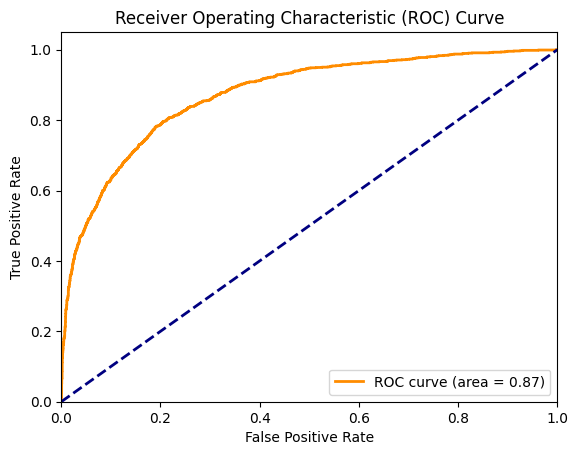

In [54]:
xgb_clf =XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,)
xgb_clf.fit(df1_train, y1_train)


y_pred = xgb_clf.predict(df1_test)
accuracy = accuracy_score(y1_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

y_prob = xgb_clf.predict_proba(df1_test)[:,1]
roc_auc = roc_auc_score(y1_test, y_prob)
print("ROC AUC Score:", roc_auc)

fpr, tpr, thresholds = roc_curve(y1_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()





In [50]:
def grid_search():
    xgb = XGBClassifier()
    param_grid = {
        'n_estimators': [100, 200, 300, 400, 500],
        'max_depth': [3, 5, 7, 9],
        'learning_rate': [0.01, 0.03, 0.1, 0.2],
        'subsample': [0.7, 0.8, 0.9]
    }
    grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

    grid_search.fit(df1_train, y1_train)

    print("Best hyperparameters:", grid_search.best_params_)

    best_model = grid_search.best_estimator_
    accuracy = accuracy_score(y1_test, best_model.predict(df1_test))
    
    print(f"Accuracy: {accuracy * 100:.2f}%")

In [51]:
grid_search()

Best hyperparameters: {'learning_rate': 0.03, 'max_depth': 5, 'n_estimators': 400, 'subsample': 0.7}
Accuracy: 85.59%


Best hyperparameters: {'learning_rate': 0.03, 'max_depth': 5, 'n_estimators': 400, 'subsample': 0.7}
Accuracy: 85.59%

In [31]:
def random_search():
   
    xgb = XGBClassifier()

    random_grid = {
        'n_estimators': [100, 200, 300, 400, 500],
        'max_depth': [3, 5, 7, 9, 11, 13, 15],
        'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    }

    
    random_search = RandomizedSearchCV(estimator=xgb, param_distributions=random_grid, n_iter=100, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
  
    random_search.fit(df1_train, y1_train)
    print("Best hyperparameters:", random_search.best_params_)

    best_model = random_search.best_estimator_
    accuracy = accuracy_score(y1_test, best_model.predict(df1_test))
    
    print(f"Accuracy: {accuracy * 100:.2f}%")
random_search()

Best hyperparameters: {'subsample': 0.5, 'n_estimators': 400, 'max_depth': 7, 'learning_rate': 0.01}
Accuracy: 85.68%


Best hyperparameters: {'subsample': 0.5, 'n_estimators': 400, 'max_depth': 7, 'learning_rate': 0.01}
Accuracy: 85.68%

In [32]:
df2_train, df2_test, y2_train, y2_test =train_test_split(df2, Y2, test_size=0.20, random_state=42)

In [33]:
print(df2_test.shape)
print(df2_train.shape)

(5342, 111)
(21365, 111)


Accuracy: 79.37%
ROC AUC Score: 0.865885432653654


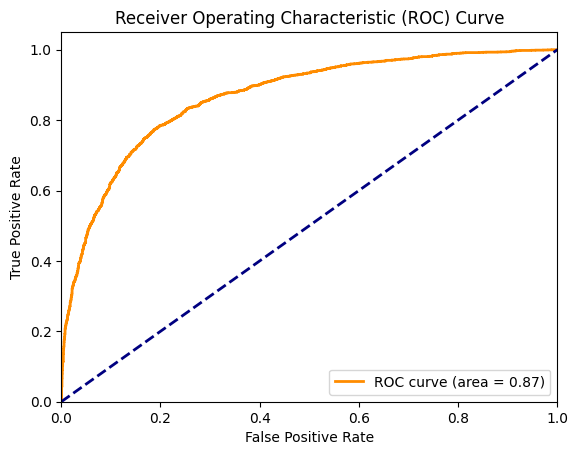

In [55]:
xgb_clf =XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,)
xgb_clf.fit(df2_train, y2_train)

y_pred = xgb_clf.predict(df2_test)

accuracy = accuracy_score(y2_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
y_prob = xgb_clf.predict_proba(df2_test)[:,1]
roc_auc = roc_auc_score(y2_test, y_prob)
print("ROC AUC Score:", roc_auc)

fpr, tpr, thresholds = roc_curve(y2_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



In [35]:
def random_search():

    xgb = XGBClassifier()

    random_grid = {
        'n_estimators': [100, 200, 300, 400, 500],
        'max_depth': [3, 5, 7, 9, 11, 13, 15],
        'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    }
    random_search = RandomizedSearchCV(estimator=xgb, param_distributions=random_grid, n_iter=100, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)

    random_search.fit(df2_train, y2_train)

    print("Best hyperparameters:", random_search.best_params_)

    best_model = random_search.best_estimator_
    accuracy = accuracy_score(y2_test, best_model.predict(df2_test))
    
    print(f"Accuracy: {accuracy * 100:.2f}%")
random_search()

Best hyperparameters: {'subsample': 0.7, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1}
Accuracy: 79.56%


Best hyperparameters: {'subsample': 0.7, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1}
Accuracy: 79.56%

In [56]:
train_file_path= "test_set_features.csv";
df_test=pd.read_csv(train_file_path);
df_test = df_test.drop(columns=['respondent_id'])

df_test

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26703,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,dqpwygqj,"MSA, Principle City",1.0,1.0,NaN,NaN
26704,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,Below Poverty,Married,Rent,Employed,qufhixun,Non-MSA,1.0,3.0,fcxhlnwr,vlluhbov
26705,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,qufhixun,"MSA, Not Principle City",1.0,0.0,NaN,NaN
26706,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,bhuqouqj,"MSA, Not Principle City",1.0,0.0,NaN,NaN


In [57]:
df_test=preprocess(df_test)

In [58]:
df_test.columns = df_test.columns.str.replace(r'\W', '_', regex=True)
df_test.columns = df_test.columns.str.replace(',', '_')

In [59]:
def get_model(subsample, n_estimators, max_depth, learning_rate):
    return XGBClassifier(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, subsample=subsample)
    # return XGBClassifier(hparams)

def scaler(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

def train_model(model, X_train, y_train):
    
    
    model.fit(X_train, y_train)
    return model

def save_model(model, model_path):
    model.save_model(model_path)

model = get_model(learning_rate=0.03, max_depth= 5, n_estimators= 400, subsample= 0.7)
model = train_model(model, df1_train, y1_train)
save_model(model, 'model1.json')

model = get_model(subsample= 0.7, n_estimators= 200, max_depth= 3, learning_rate= 0.1)
model = train_model(model, df2_train, y2_train)
save_model(model, 'model2.json')



In [60]:
def load_model(model_path):
    model = XGBClassifier()
    model.load_model(model_path)
    return model

In [77]:
loaded_model1 = load_model('model1.json')
loaded_model2 = load_model('model2.json')

In [78]:
df_test1 = df_test.drop(columns=["household_children","household_adults","opinion_seas_sick_from_vacc"])
y1_pred = loaded_model1.predict_proba(df_test1.values)[:,1]

In [79]:
df_test2 = df_test.drop(columns=["behavioral_antiviral_meds"])
y2_pred = loaded_model2.predict_proba(df_test2.values)[:,1]

In [80]:
submission_csv = pd.read_csv("submission_format.csv")

In [81]:
submission_csv.h1n1_vaccine=y1_pred
submission_csv.seasonal_vaccine=y2_pred


In [82]:
submission_csv.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.088673,0.236738
1,26708,0.030619,0.030552
2,26709,0.195247,0.612381
3,26710,0.721023,0.888989
4,26711,0.264854,0.469212


In [83]:
# save predictions
submission_csv.to_csv('submission.csv',index=False)